<a href="https://colab.research.google.com/github/gtgindia/-Segmentation-based-industrial-defect-detection/blob/main/3Wobot_Predict_MaskN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras

In [2]:
import tensorflow as tf
import numpy as np


In [3]:
model1 = keras.models.load_model("/content/drive/MyDrive/Wobot/Model1/class1.h5",compile=False)
model2 = keras.models.load_model("/content/drive/MyDrive/Wobot/Model1/class2.h5",compile=False)
model3 = keras.models.load_model("/content/drive/MyDrive/Wobot/Model1/class3.h5",compile=False)
model4 = keras.models.load_model("/content/drive/MyDrive/Wobot/Model1/class4.h5",compile=False)
model5 = keras.models.load_model("/content/drive/MyDrive/Wobot/Model1/class5.h5",compile=False)
model6 = keras.models.load_model("/content/drive/MyDrive/Wobot/Model1/class6.h5",compile=False)

In [4]:
model_class2 = keras.models.load_model("/content/drive/MyDrive/Wobot/Model1/2Wobot1_train_model.h5")

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [6]:
IMAGE_CHANNELS = 1

In [7]:
def load_images(path_to_images, img_type, img_format, resize):

    image_names = [x for x in os.listdir(path_to_images) if x.endswith(img_type)]

    image_num = len(image_names)
    images_all = np.empty([image_num, resize[0], resize[1], IMAGE_CHANNELS])

    for image_index in range(image_num):
        image_filename = image_names[image_index]
        regex = re.compile(r'\d+')

        filenameidx =[int(x) for x in regex.findall(image_filename)]

        image = mpimg.imread(os.path.join(path_to_images, image_filename), format=img_format)
        

        if resize:
            image = cv2.resize(image, (resize[0], resize[1]))
      
        images_all[int(filenameidx[0])-1] = np.reshape(image, (resize[0], resize[1], IMAGE_CHANNELS))
        

    return images_all

In [8]:
dir = "/content/drive/MyDrive/Wobot/test/test"

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image


In [10]:
import re 
Xt= load_images(dir, img_type='png', img_format='gray', resize=(512, 512))

In [11]:
Xt.shape

(120, 512, 512, 1)

In [12]:
ac1 = model1.predict(Xt)
ac2 = model2.predict(Xt)
ac3 = model3.predict(Xt)
ac4 = model4.predict(Xt)
ac5 = model5.predict(Xt)
ac6 = model6.predict(Xt)


In [13]:
predictions = model_class2.predict(Xt)

In [14]:
Xt.shape

(120, 512, 512, 1)

In [15]:
#predictions
score = tf.nn.softmax(predictions)
scorearr = np.array(score)
x = scorearr.argmax(axis = 1)[:,None]
x.shape

(120, 1)

In [16]:
pred=[]
a = 0
for i in x:
  if(i==0):
    predict = ac1[a,:,:,0]
  elif(i==1):
    predict = ac2[a,:,:,0]
  elif(i==2):
    predict = ac3[a,:,:,0]
  elif(i==3):
    predict = ac4[a,:,:,0]
  elif(i==4):
    predict = ac5[a,:,:,0]
  elif(i==5):
    predict = ac6[a,:,:,0]
  else:
    print("Error")

  pred.append(predict)
  a +=1
    

In [17]:
predarr = np.array(pred)

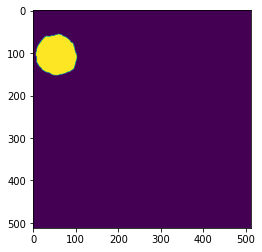

In [18]:
plt.imshow(predarr[3,:,:])

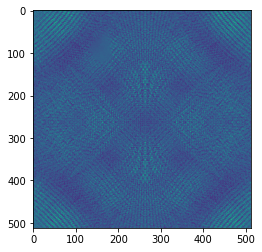

In [19]:
plt.imshow(Xt[0,:,:,0])

In [20]:
from PIL import Image
import numpy as np
for i in range(120):
  col = Image.fromarray(predarr[i,:,:]*255)
  gray = col.convert('L')

# Let numpy do the heavy lifting for converting pixels to pure black or white
  bw = np.asarray(gray).copy()

# Pixel range is 0...255, 256/2 = 128
  bw[bw < 128] = 0   # Black
  bw[bw >= 128] = 255 # White

# Now we put it back in Pillow/PIL land
  imfile = Image.fromarray(bw)
  imfile.save("/content/drive/MyDrive/Wobot/test_outputs/{0}.jpeg".format(i+1))


In [21]:
#Just to confirm that 2Wobot1_train_model.h5 is working
intx = x.astype(int)
np.savetxt("Testindex.txt", intx, fmt='% d')